# Dataset

In [ ]:
 import zipfile

In [ ]:
!pip install kaggle


In [ ]:
from google.colab import files
files.upload()

Saving falldeteciton.csv to falldeteciton.csv


{'falldeteciton.csv': b'ACTIVITY,TIME,SL,EEG,BP,HR,CIRCLUATION\r\n3,4722.92,4019.64,-1.60E+03,13,79,317\r\n2,4059.12,2191.03,-1146.08,20,54,165\r\n2,4773.56,2787.99,-1263.38,46,67,224\r\n4,8271.27,9545.98,-2848.93,26,138,554\r\n4,7102.16,14148.8,-2381.15,85,120,809\r\n5,7015.24,7336.79,-1699.8,22,95,427\r\n3,8620.28,24949.9,-3198.06,35,157,1519\r\n3,9238.73,39245.5,-2.59E+03,15,196,1885\r\n0,12276.4,59742,-5101,56,249,2826\r\n4,14165.5,140950,-1.41E+03,82,315,5844\r\n0,7069.95,15336.6,-3000.09,81,133,847\r\n5,10768.8,28521,-3732.37,61,214,1469\r\n0,10255.7,66668,-6050,97,207,3048\r\n0,6411.13,9698,-2686,59,104,652\r\n4,8766.37,11524.1,-3270.78,44,156,654\r\n3,9764.47,51960.7,-2.51E+03,16,188,2599\r\n3,15208.6,90305.4,-2.28E+03,53,223,2059\r\n0,6628.08,6490.83,-1923.04,23,100,485\r\n0,7836.78,5545,-2661,41,126,371\r\n0,10787.8,103850,-4705,85,237,4804\r\n0,7347.39,13978,-3121,24,126,765\r\n3,15563.6,110121,-6.38E+03,38,322,4619\r\n2,5091.81,4269.08,-1.52E+03,10,79,317\r\n3,3840,1433.37,

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d pitasr/falldata

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
# opening the zip file in READ mode
!unzip \*.zip  && rm *.zip


unzip:  cannot find or open *.zip, *.zip.zip or *.zip.ZIP.

No zipfiles found.


# Análise dos dados

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

In [ ]:
dataset = pd.read_csv('falldeteciton.csv', sep=',', encoding = 'ISO-8859-1',decimal=',',index_col=False)

In [ ]:
dataset.head(5)

,ACTIVITY,TIME,SL,EEG,BP,HR,CIRCLUATION
0,3,4722.92,4019.64,-1.60E+03,13,79,317
1,2,4059.12,2191.03,-1146.08,20,54,165
2,2,4773.56,2787.99,-1263.38,46,67,224
3,4,8271.27,9545.98,-2848.93,26,138,554
4,4,7102.16,14148.8,-2381.15,85,120,809


In [ ]:
dataset.isnull().sum()

ACTIVITY       0
TIME           0
SL             0
EEG            0
BP             0
HR             0
CIRCLUATION    0
dtype: int64

In [ ]:

dataset['OVERALL'] = dataset['ACTIVITY'].apply(lambda x : 'Stading' if x == 0 else 'Walking' if x == 1 else 'Sitting' if x == 2 else 'Falling' if x ==3 else 'Cramps' if x == 4 else 'Running' if x==5 else 'Desconhecido')
dataset.OVERALL = dataset.OVERALL.astype('category')

0- Standing
1- Walking
2- Sitting
3- Falling
4- Cramps
5- Running

In [ ]:
dataset.head(-1)

,ACTIVITY,TIME,SL,EEG,BP,HR,CIRCLUATION,OVERALL
0,3,4722.92,4019.64,-1.60E+03,13,79,317,Falling
1,2,4059.12,2191.03,-1146.08,20,54,165,Sitting
2,2,4773.56,2787.99,-1263.38,46,67,224,Sitting
3,4,8271.27,9545.98,-2848.93,26,138,554,Cramps
4,4,7102.16,14148.8,-2381.15,85,120,809,Cramps
...,...,...,...,...,...,...,...,...
16376,4,13625.9,61109.9,-4.44E+03,27,247,2754,Cramps
16377,4,9280.68,11417,-3021.64,36,156,654,Cramps
16378,3,8479.69,9455.54,-2932.85,17,138,554,Falling
16379,2,8872.53,27449.9,-2.87E+03,33,156,1364,Sitting


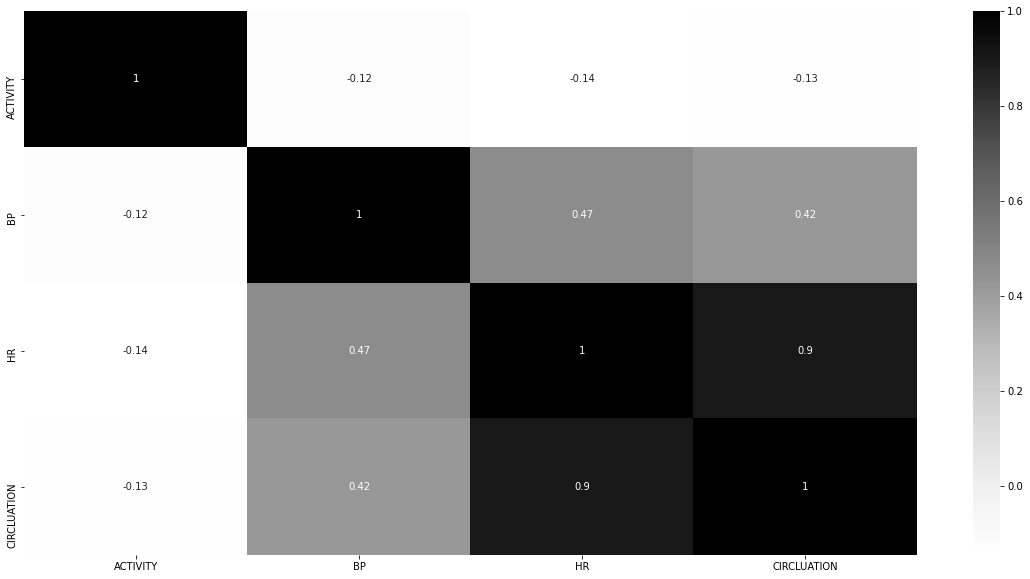

In [ ]:

plt.figure(figsize=(20,10))
ax = sns.heatmap(dataset.corr(), cmap='Greys', annot=True)
plt.show()

     |████████████████████████████████| 15.1MB 277kB/s 
     |████████████████████████████████| 81kB 7.8MB/s 
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


                                             |          | [  0%]   00:00 -> (? left)


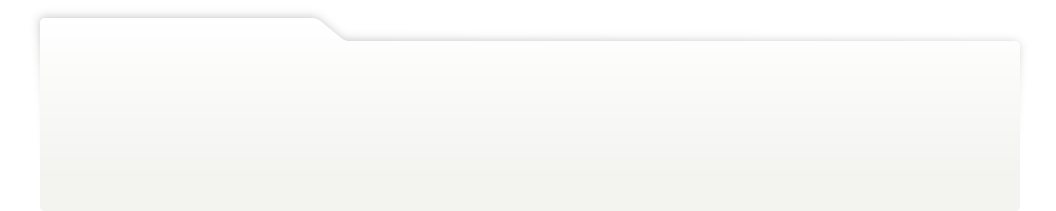
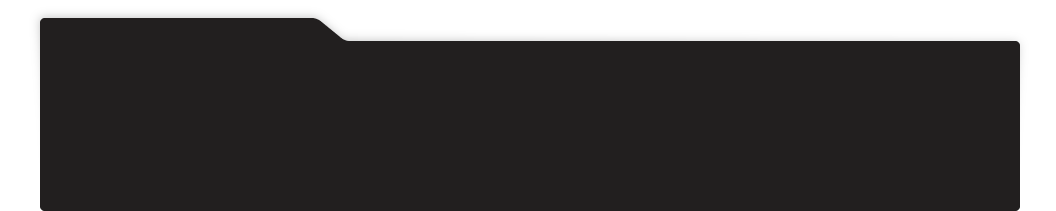
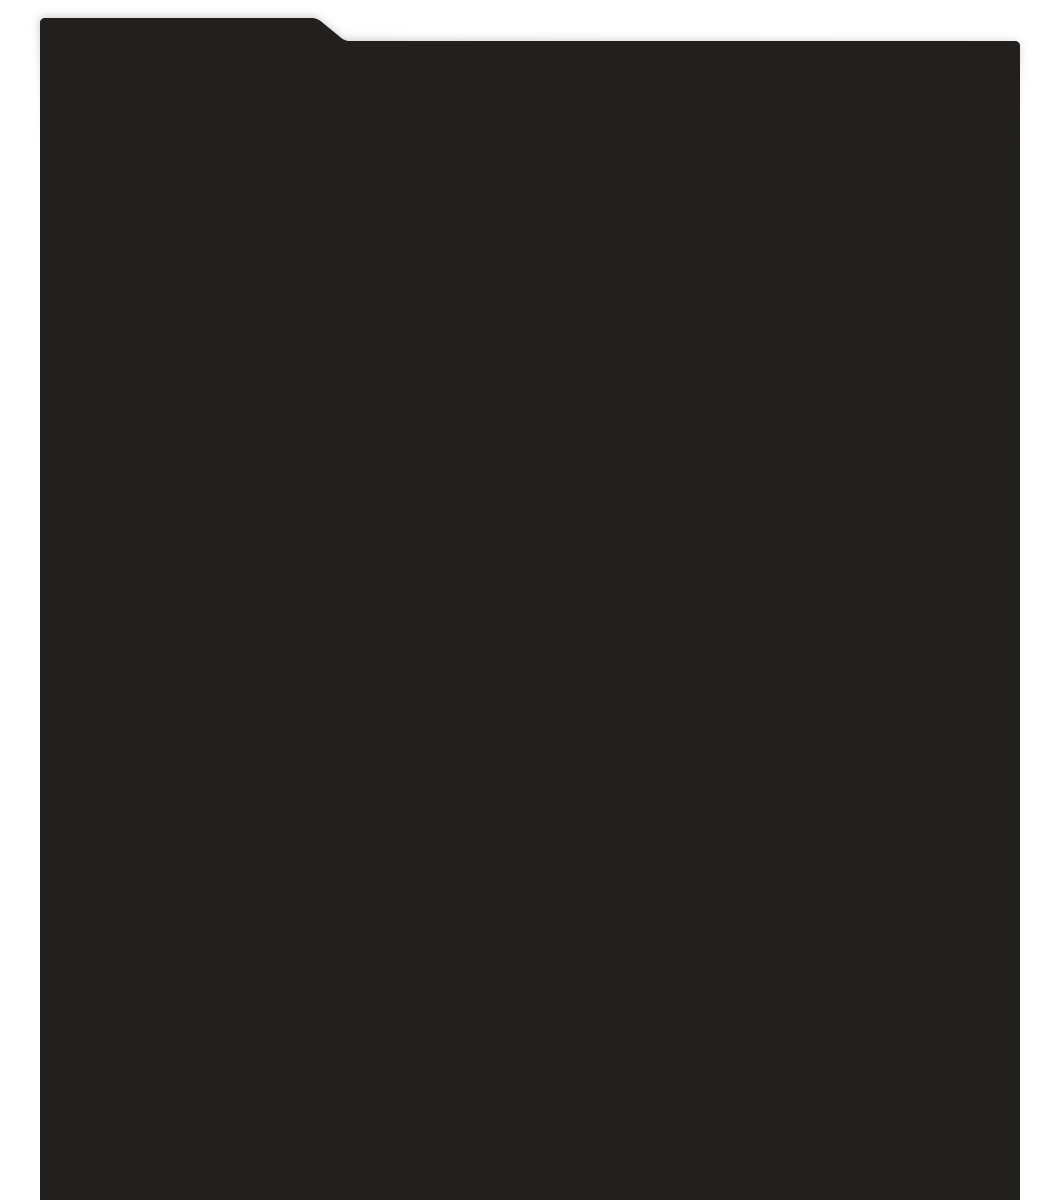
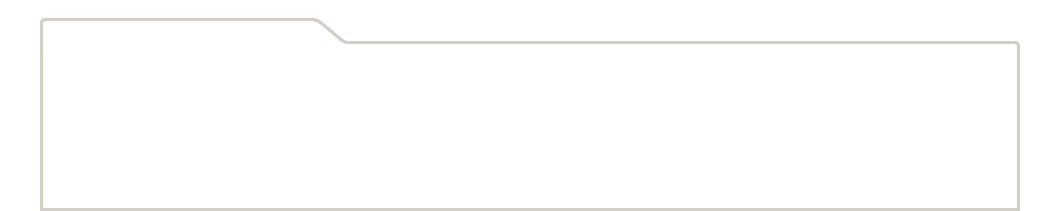
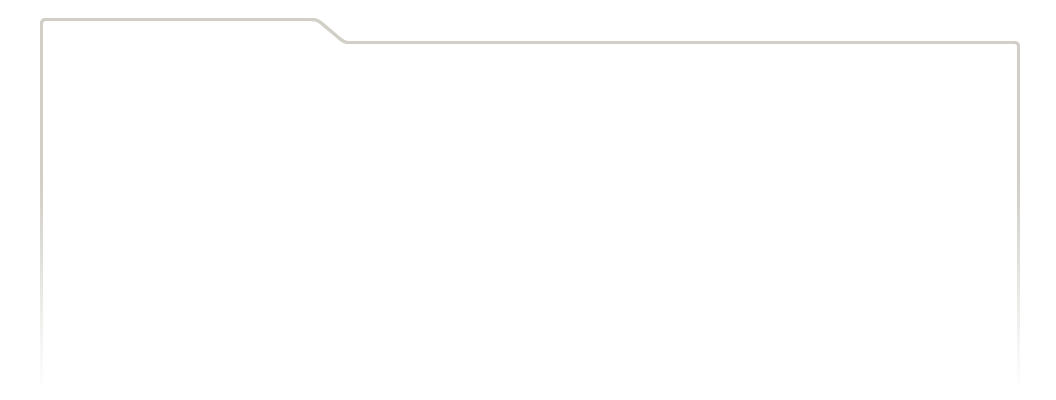
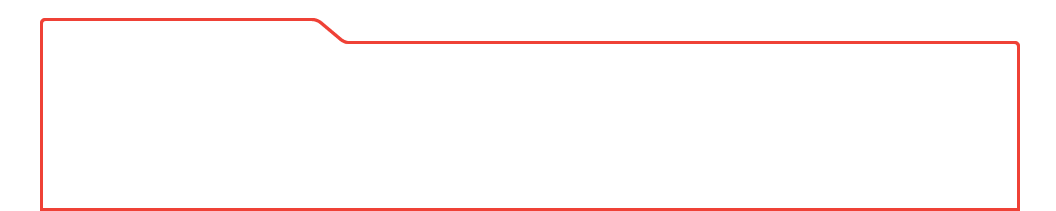
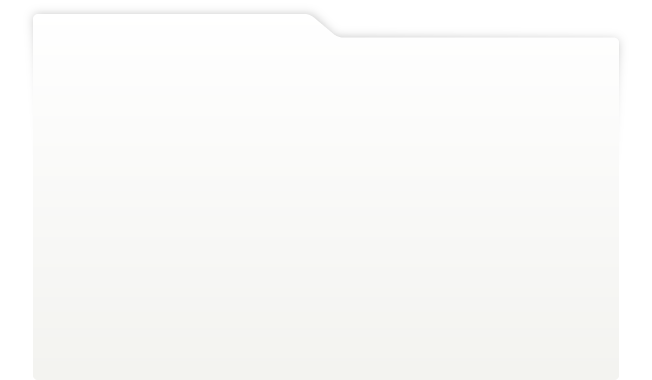
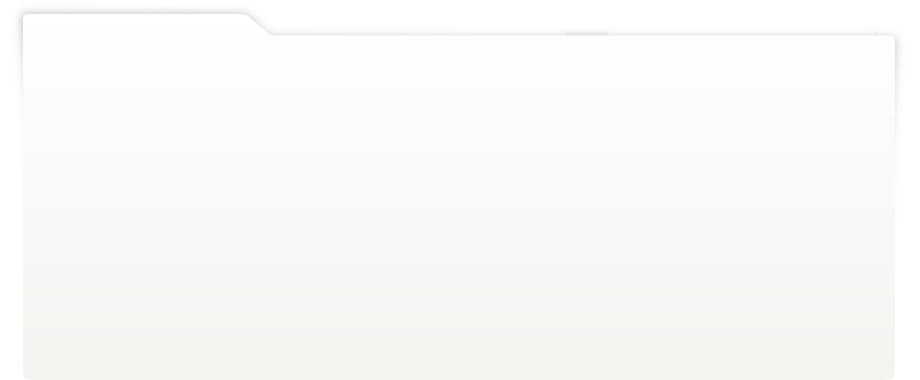
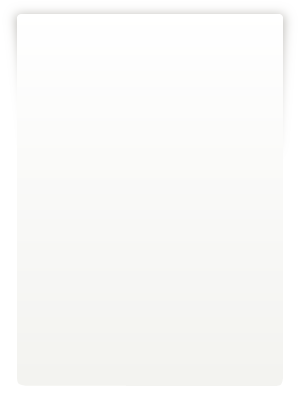
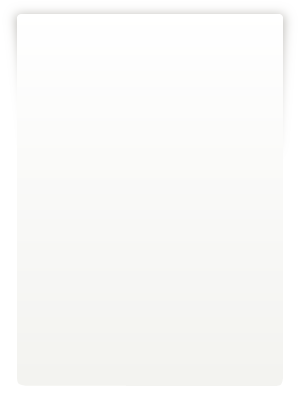
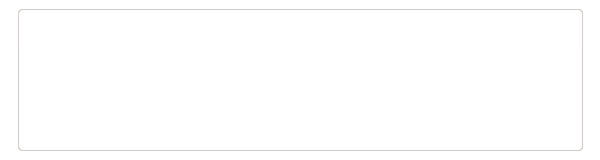
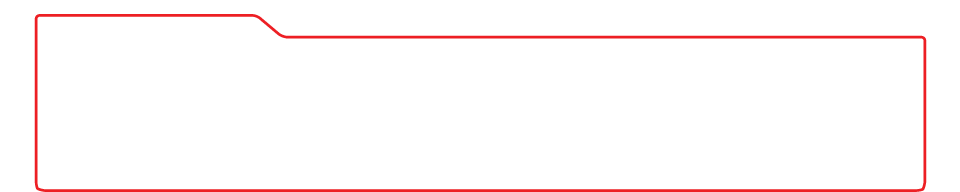
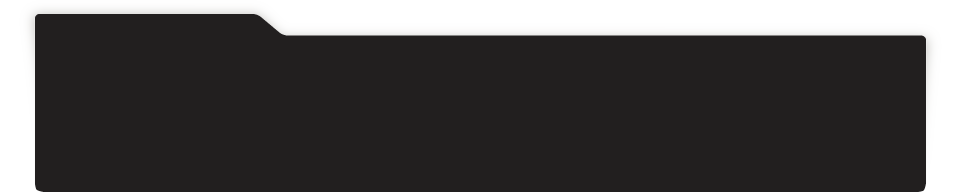
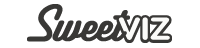
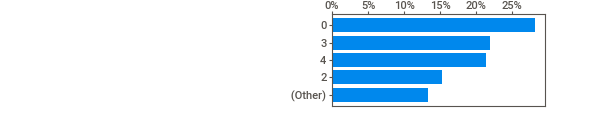
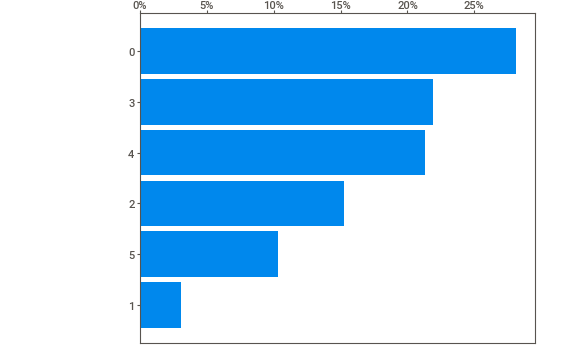
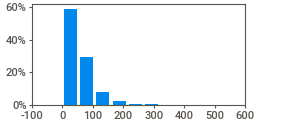
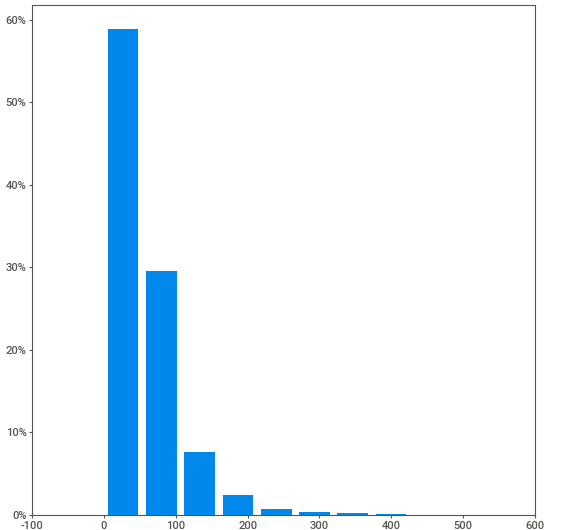
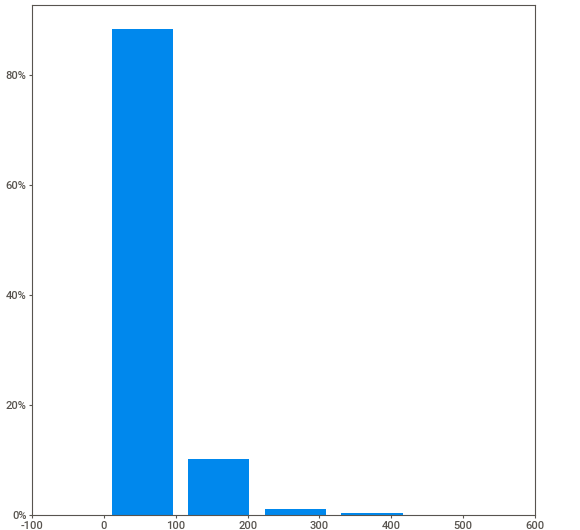
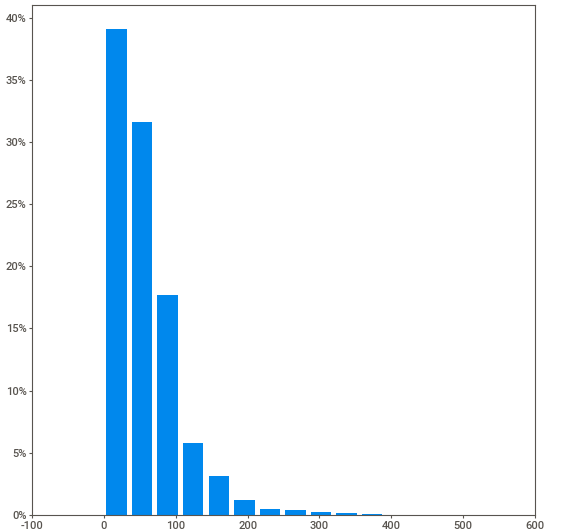
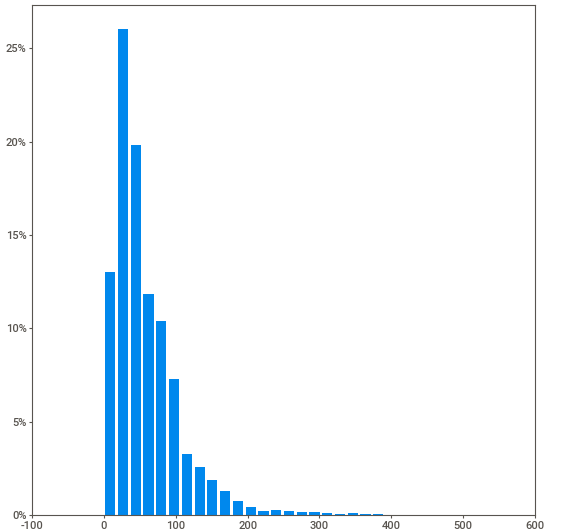
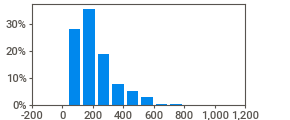
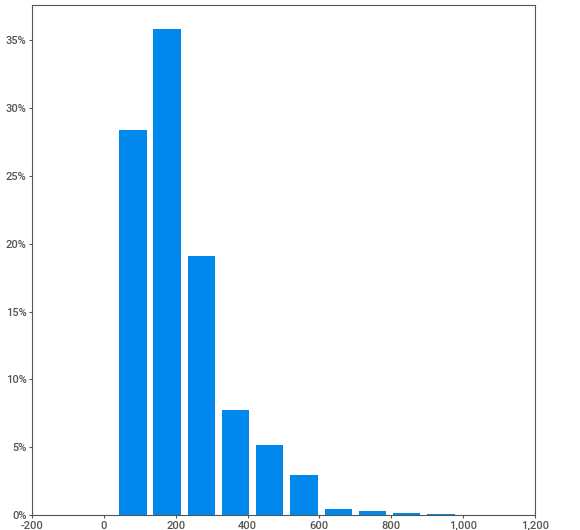
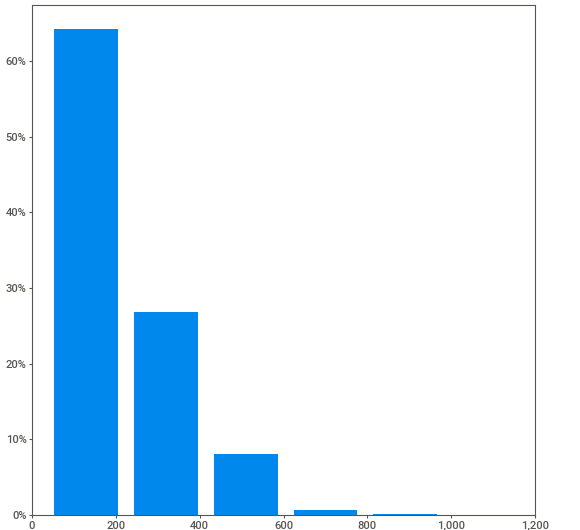
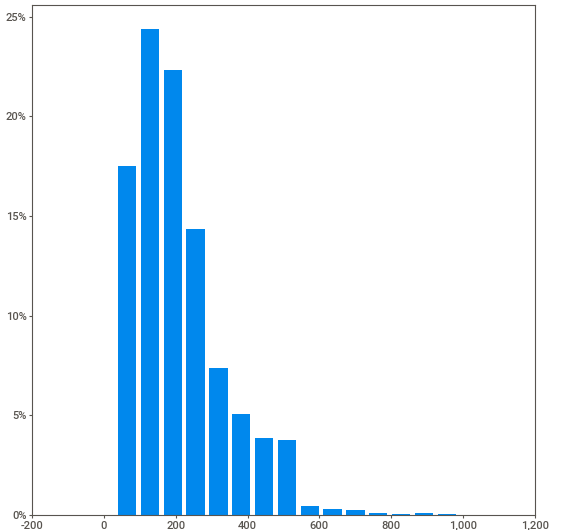
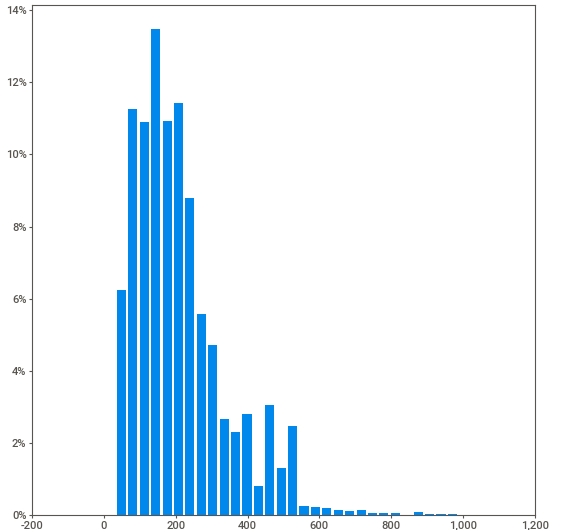
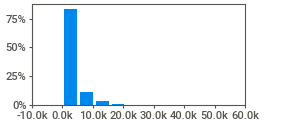
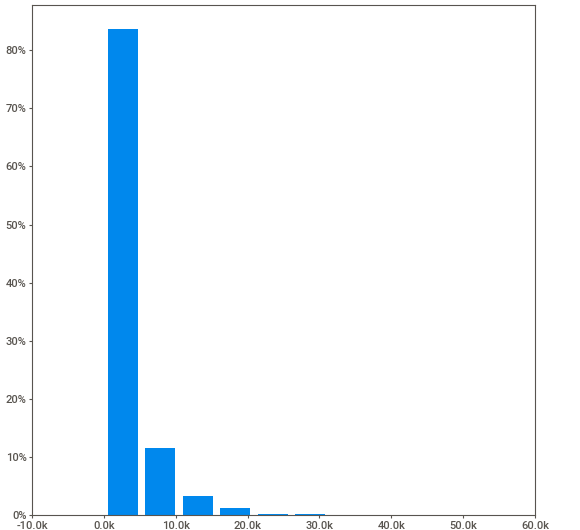
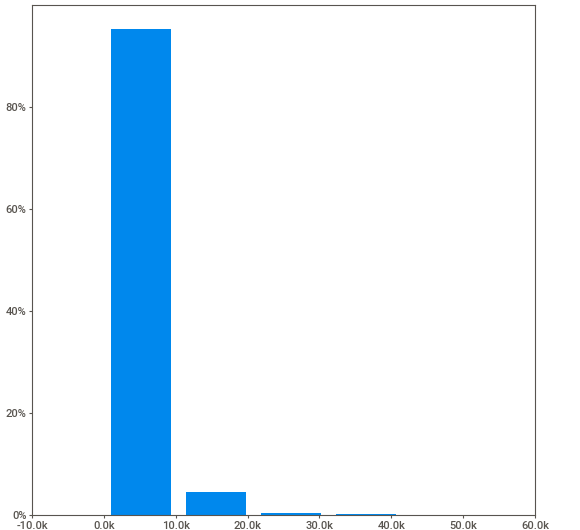
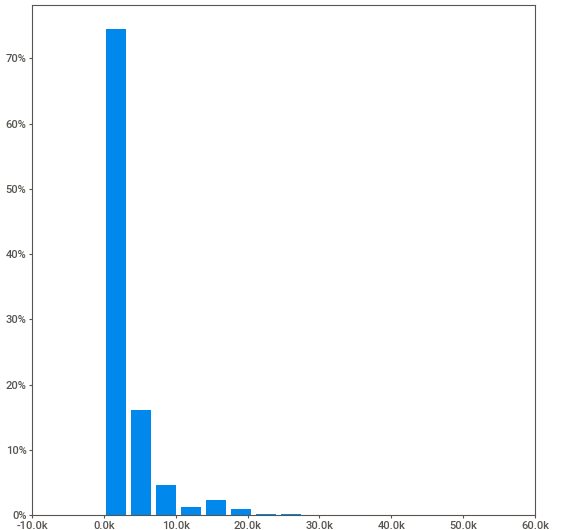
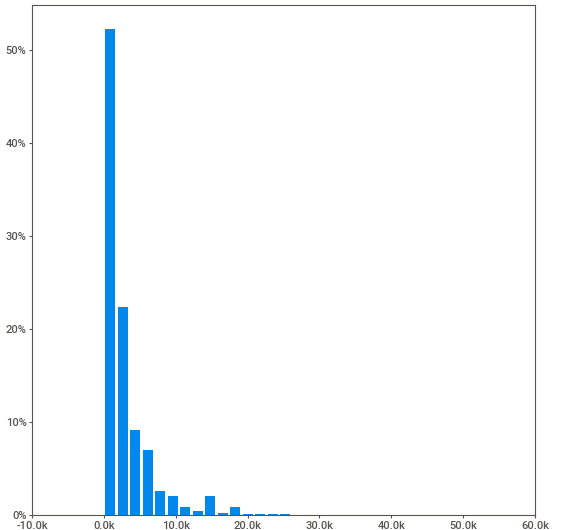
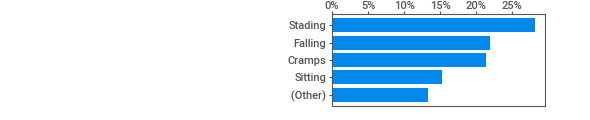
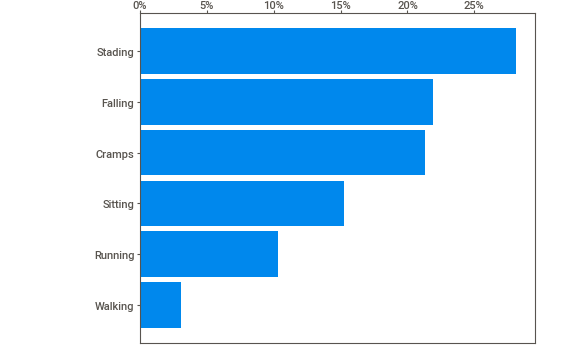
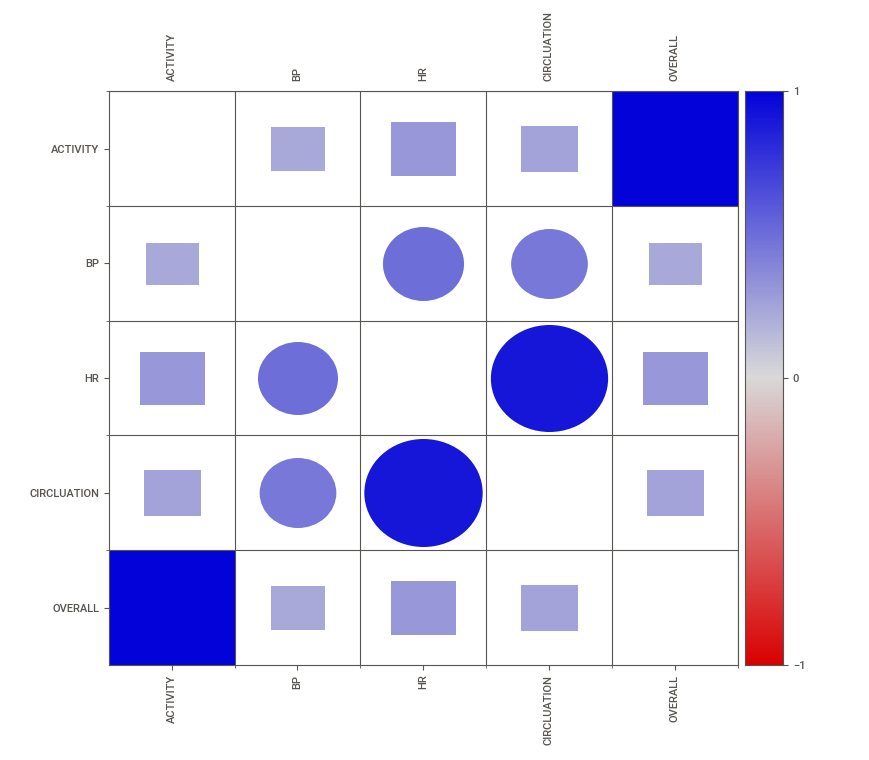
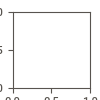

In [ ]:
# Instalar a biblioteca
!pip install sweetviz
import sweetviz as sv

# Cria o reporte e chama de my_report
my_report = sv.analyze(dataset)

# gráfico no própio notebook
my_report.show_notebook()
# clicar em "ASSOCIATIONS" na pagina do sweetviz para ver a tabela de associação

#Separando Feature e target

In [ ]:
x = dataset.iloc[0:,:]
y= dataset.iloc[0::,0]

In [ ]:
x = x.drop(['OVERALL'], axis=1) #Coluna dropada também porque só foi utilizada para AED

In [ ]:
 x = x.drop(['ACTIVITY'], axis=1)

In [ ]:
y.head(5)

0    3
1    2
2    2
3    4
4    4
Name: ACTIVITY, dtype: int64

In [ ]:
#exibir 10 primeiros dados
print(x.shape)
x[:11]

(16382, 6)


,TIME,SL,EEG,BP,HR,CIRCLUATION
0,4722.92,4019.64,-1.60E+03,13,79,317
1,4059.12,2191.03,-1146.08,20,54,165
2,4773.56,2787.99,-1263.38,46,67,224
3,8271.27,9545.98,-2848.93,26,138,554
4,7102.16,14148.8,-2381.15,85,120,809
5,7015.24,7336.79,-1699.8,22,95,427
6,8620.28,24949.9,-3198.06,35,157,1519
7,9238.73,39245.5,-2.59E+03,15,196,1885
8,12276.4,59742,-5101,56,249,2826
9,14165.5,140950,-1.41E+03,82,315,5844


#KNN train(inicial)

In [ ]:
#treino e teste
from sklearn.model_selection import train_test_split
#classificador
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)



In [ ]:
def convert_array(a):
  a = np.array(a)
  return (a)

In [ ]:
convert_array(x_train)
convert_array(x_test)
convert_array(y_train)
convert_array(y_test)


array([3, 0, 0, ..., 4, 4, 0])

In [ ]:
print(x_train.shape,y_train.shape)
print(x_test.shape, y_test.shape)

(12286, 6) (12286,)
(4096, 6) (4096,)


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 4) #int(input())
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [ ]:
y_pred = knn.predict(x_test)


#Analisando Classificação por KNN

In [ ]:
# Importando métricas para validação do modelo
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Imprimindo a matriz confusa
print("Matriz Confusa: ")
print(confusion_matrix(y_test, y_pred), "\n")

# Imprimindo o relatório de classificação
print("Relatório de classificação: \n", classification_report(y_test, y_pred))


# Imprimindo o quão acurado foi o modelo
print('Acurácia do modelo: ' , accuracy_score(y_test, y_pred))

Matriz Confusa: 
[[787  12  41 109 123  61]
 [  0 102  22   2   1   0]
 [ 16  20 437 111  29   6]
 [ 40   2 159 571 126  20]
 [ 67   5  59 186 492  74]
 [ 42   4  21  46 126 177]] 

Relatório de classificação: 
               precision    recall  f1-score   support

           0       0.83      0.69      0.75      1133
           1       0.70      0.80      0.75       127
           2       0.59      0.71      0.64       619
           3       0.56      0.62      0.59       918
           4       0.55      0.56      0.55       883
           5       0.52      0.43      0.47       416

    accuracy                           0.63      4096
   macro avg       0.63      0.63      0.63      4096
weighted avg       0.64      0.63      0.63      4096

Acurácia do modelo:  0.62646484375


In [ ]:

# Calculating error for K values between 1 and 40

def search_neighborn(x_train,y_train,x_test,y_test):
  error = []
  for i in range(1, 12):
      knn = KNeighborsClassifier(n_neighbors=i, weights='uniform', algorithm= 'auto', leaf_size= 30, p=2, metric='minkowski',metric_params=None, n_jobs=None)
      knn.fit(x_train, y_train)
      pred_i = knn.predict(x_test)
      error.append(np.mean(pred_i != y_test))
  return(error)

In [ ]:
print(search_neighborn(x_train,y_train,x_test,y_test))

[0.36962890625, 0.361572265625, 0.360595703125, 0.37353515625, 0.369384765625, 0.36767578125, 0.371337890625, 0.371826171875, 0.375244140625, 0.373779296875, 0.379638671875]


Text(0, 0.5, 'Mean Error')

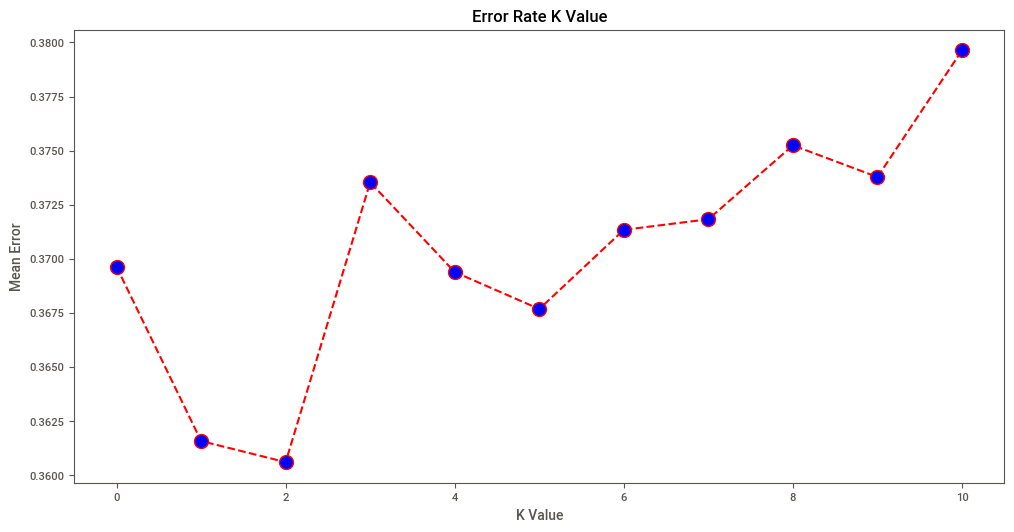

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(0, 11), search_neighborn(x_train,y_train,x_test,y_test), color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

Treinando com o melhor valor de k

In [ ]:
def comparador(error):
  a = 0
  for i in range (0,len(error)):

    if error[i]== min(error):
      men = i
      if men == 0:
        men = men + 1
      return (men)

In [ ]:
print(comparador(search_neighborn(x_train,y_train,x_test,y_test)))

2


In [ ]:
classifier2 = KNeighborsClassifier(n_neighbors=comparador(search_neighborn(x_train,y_train,x_test,y_test)))
classifier2.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [ ]:
y_pred2 = classifier2 .predict(x_test)




##Analisando novamente com melhora nos hiperparâmetros

In [ ]:

# Imprimindo a matriz confusa
print("Matriz Confusa: ")
print(confusion_matrix(y_test, y_pred), "\n")

# Imprimindo o relatório de classificação
print("Relatório de classificação: \n", classification_report(y_test, y_pred2))


# Imprimindo o quão acurado foi o modelo
print('Acurácia do modelo: ' , accuracy_score(y_test, y_pred2))

Matriz Confusa: 
[[787  12  41 109 123  61]
 [  0 102  22   2   1   0]
 [ 16  20 437 111  29   6]
 [ 40   2 159 571 126  20]
 [ 67   5  59 186 492  74]
 [ 42   4  21  46 126 177]] 

Relatório de classificação: 
               precision    recall  f1-score   support

           0       0.80      0.77      0.79      1133
           1       0.65      0.80      0.72       127
           2       0.56      0.74      0.64       619
           3       0.55      0.61      0.58       918
           4       0.59      0.53      0.56       883
           5       0.64      0.38      0.47       416

    accuracy                           0.64      4096
   macro avg       0.63      0.64      0.63      4096
weighted avg       0.64      0.64      0.64      4096

Acurácia do modelo:  0.638427734375


##Comparando os resultados

In [ ]:

print('A acurácia aumentou', accuracy_score(y_test, y_pred2)-  accuracy_score(y_test, y_pred),'%')

A acurácia aumentou 0.011962890625 %


#Referências

In [ ]:
#https://inferir.com.br/artigos/algoritimo-knn-para-classificacao/